识别双变量关系中的离群值和意外值

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covidtotals = pd.read_csv('C:\dataClean\Python-Data-Cleaning-Cookbook\Chapter04\data\covidtotals.csv')
covidtotals.set_index('iso_code', inplace=True)
totvars = ['location', 'total_cases', 'total_deaths', 'total_cases_pm', 'total_deaths_pm']
demovars = ['population', 'pop_density', 'median_age', 'gdp_per_capita', 'hosp_beds']

In [4]:
covidtotals.corr(method="pearson")

,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
total_cases,1.000000,0.932079,0.182246,0.247464,0.270030,-0.028737,0.162698,0.186835,0.027601
total_deaths,0.932079,1.000000,0.179812,0.394811,0.212619,-0.031645,0.205128,0.198729,0.019990
total_cases_pm,0.182246,0.179812,1.000000,0.586468,-0.056009,0.110043,0.313836,0.651200,0.081449
total_deaths_pm,0.247464,0.394811,0.586468,1.000000,-0.013902,0.030281,0.389595,0.383672,0.120488
population,0.270030,0.212619,-0.056009,-0.013902,1.000000,-0.023084,0.024395,-0.059555,-0.038329
pop_density,-0.028737,-0.031645,0.110043,0.030281,-0.023084,1.000000,0.178878,0.315199,0.314973
median_age,0.162698,0.205128,0.313836,0.389595,0.024395,0.178878,1.000000,0.648905,0.662222
gdp_per_capita,0.186835,0.198729,0.651200,0.383672,-0.059555,0.315199,0.648905,1.000000,0.296995
hosp_beds,0.027601,0.019990,0.081449,0.120488,-0.038329,0.314973,0.662222,0.296995,1.000000


In [5]:
covidtotalsonly=covidtotals.loc[:, totvars]
covidtotalsonly['total_cases_q'] = pd.qcut(covidtotalsonly['total_cases'], labels=['very low', 'low', 'medium', 'high', 'very high'], q=5, precision=0)
covidtotalsonly['total_deaths_q'] = pd.qcut(covidtotalsonly['total_deaths'], labels=['very low', 'low', 'medium', 'high', 'very high'], q=5, precision=0)

In [6]:
# 交叉表分析
pd.crosstab(covidtotalsonly.total_cases_q, covidtotalsonly.total_deaths_q)

total_deaths_q,very low,low,medium,high,very high
total_cases_q,,,,,
very low,34,7,1,0,0
low,12,19,10,1,0
medium,1,13,15,13,0
high,0,0,12,24,6
very high,0,0,2,4,36


In [9]:
# 由于具有相同的索引列
covidtotals.loc[(covidtotalsonly.total_cases_q == 'very low') & (covidtotalsonly.total_deaths_q == 'medium')].T

iso_code,SXM
lastdate,2020-06-01
location,Sint Maarten (Dutch part)
total_cases,77
total_deaths,15
total_cases_pm,1795.625
total_deaths_pm,349.797
population,42882.000
pop_density,1209.088
median_age,NaN
gdp_per_capita,36327.232


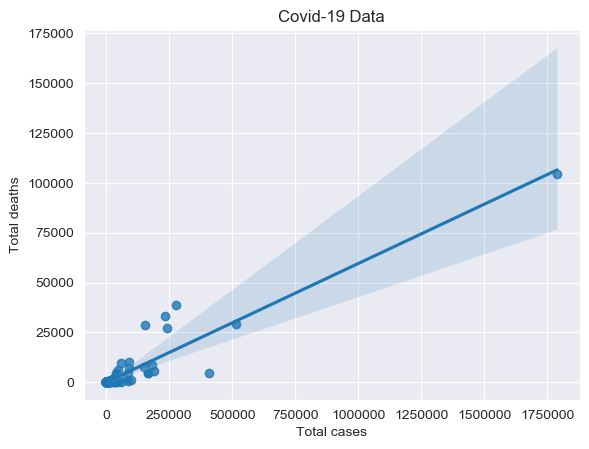

In [10]:
# 绘制散点图
ax = sns.regplot(x="total_cases", y="total_deaths", data=covidtotals)
ax.set(xlabel='Total cases', ylabel='Total deaths', title='Covid-19 Data')
plt.show()

In [12]:
# 检查高于或低于回归线的值
covidtotals.loc[(covidtotals.total_cases < 300000) & (covidtotals.total_deaths > 20000)].T

iso_code,FRA,ITA,ESP,GBR
lastdate,2020-06-01,2020-06-01,2020-05-31,2020-06-01
location,France,Italy,Spain,United Kingdom
total_cases,151753,233019,239429,274762
total_deaths,28802,33415,27127,38489
total_cases_pm,2324.879,3853.985,5120.952,4047.403
total_deaths_pm,441.251,552.663,580.197,566.965
population,65273512.000,60461828.000,46754783.000,67886004.000
pop_density,122.578,205.859,93.105,272.898
median_age,42.000,47.900,45.500,40.800
gdp_per_capita,38605.671,35220.084,34272.360,39753.244


In [13]:
# 检查下方
covidtotals.loc[(covidtotals.total_cases > 250000) & (covidtotals.total_deaths < 25000)].T

iso_code,RUS
lastdate,2020-06-01
location,Russia
total_cases,405843
total_deaths,4693
total_cases_pm,2780.995
total_deaths_pm,32.158
population,145934460.000
pop_density,8.823
median_age,39.600
gdp_per_capita,24765.954
